# About Dataset

* The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The Drug Review Data Set is of shape (161297, 7) i.e. **It has 7 features** including the review and **161297 Data Points** or entries.
* The features are 'drugName' which is the name of the drug, 'condition' which is the condition the patient is suffering from, 'review' is the patients review, 'rating' is the 10-star patient rating for the drug, 'date' is the date of the entry and the 'usefulcount' is the number of users who found the review useful.


### Attributes :
1. **drugName :** name of drug
2.**condition :** name of condition
3. **review :** patient review
4. **rating :** 10 star patient rating
5. **date :** date of review entry
6. **usefulCount :** number of users who found review useful



# Objective :

#### The Objective of this Project is to Analyse the Dataset, plot the inferences with good visualizations and answer some Questions to extract information from the Dataset.
#### Also analyse the sentiment of the drug Users, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.


#### *Questions*
+ Types of questions we can ask?(Drugs,Review,Rating,Conditions,Time,Genuiness,etc)
+ What is the most popular drug?
+ What are the groups/classification of drugs used?
+ Which Drug has the best review?
+ How many drugs do we have?
+ The number of drugs per condition
+ Number of patients that searched on a particular drug
+ How genuine is the review? (Using sentiment analysis)
+ How many reviews are positive,negative,neutral?
+ Correlation between rating and review and users who found the review useful
+ Can you predict the rating using the review?
+ Distribution of rating
+ Amount of review made per year and per month
+ Which condition has the most review on drugs




In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# Load Sentiment Pkgs
from textblob import TextBlob

# Loading the Datset

In [8]:
# Load Dataset
df = pd.read_csv("C:/Users/coder/Jupyter Notebook/drugsComTest_raw.csv")

In [9]:
# Preview Dataset
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


# Data Exploration

In [10]:
# Columns
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [11]:
# Missing Values
df.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

#### Observation :

+ Most of the missing values are in the condition column
+ This implies that most people don't know their condition by name or privacy

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,53766.0,116386.701187,67017.739881,0.0,58272.5,116248.5,174586.75,232284.0
rating,53766.0,6.976900,3.285207,1.0,4.0,8.0,10.00,10.0
usefulCount,53766.0,27.989752,36.172833,0.0,6.0,16.0,36.00,949.0


In [13]:
df.info()
print('=============='*10)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

# EDA and Data Visualization


### -- How many drugs do we have?

In [14]:
# How many drugs do we have?
num = len(df['drugName'].unique().tolist())
print('We number of Drugs are -',num )

We number of Drugs are - 2637


###  --- What are the Most popular Drug?

In [15]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Implanon                               404
Gabapentin                             368
Bupropion                              347
Miconazole                             344
Duloxetine                             322
Venlafaxine                            322
Tramadol                               318
Clonazepam                             315
Medroxyprogesterone                    313
Citalopram                             313
Name: drugName, dtype: int64

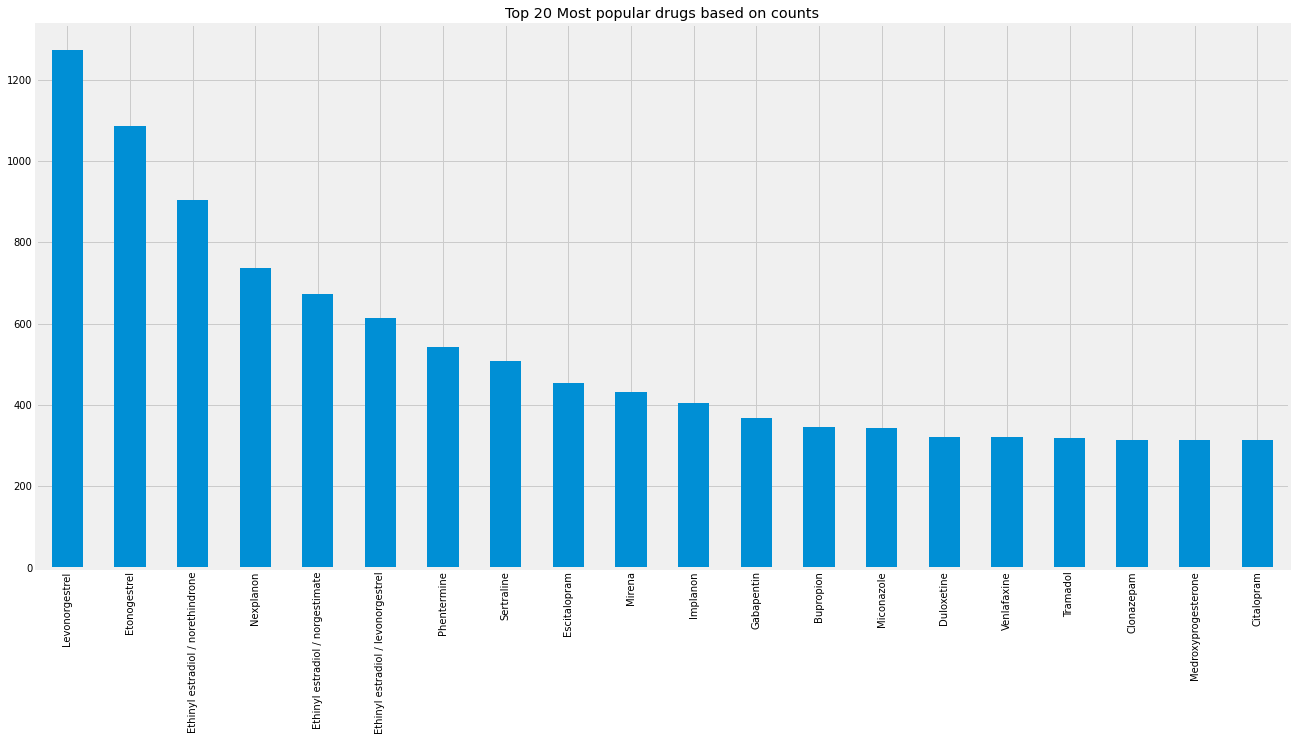

In [16]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

#### Observation
+ Most of the commonest drugs are hormonal drugs


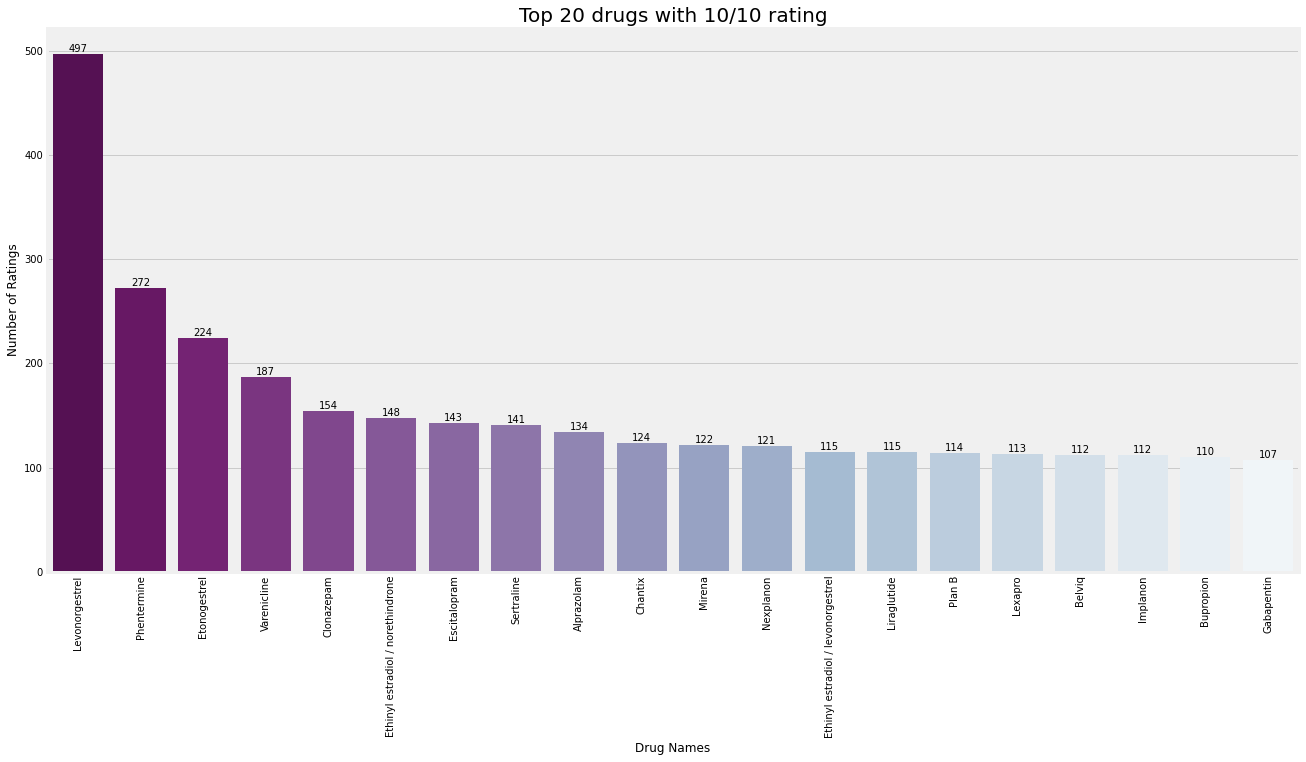

In [17]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'BuPu_r')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

**Levonorgestrel, Phentemine, Etonogestrel** are the Durgs with the **Heighest Ratings**

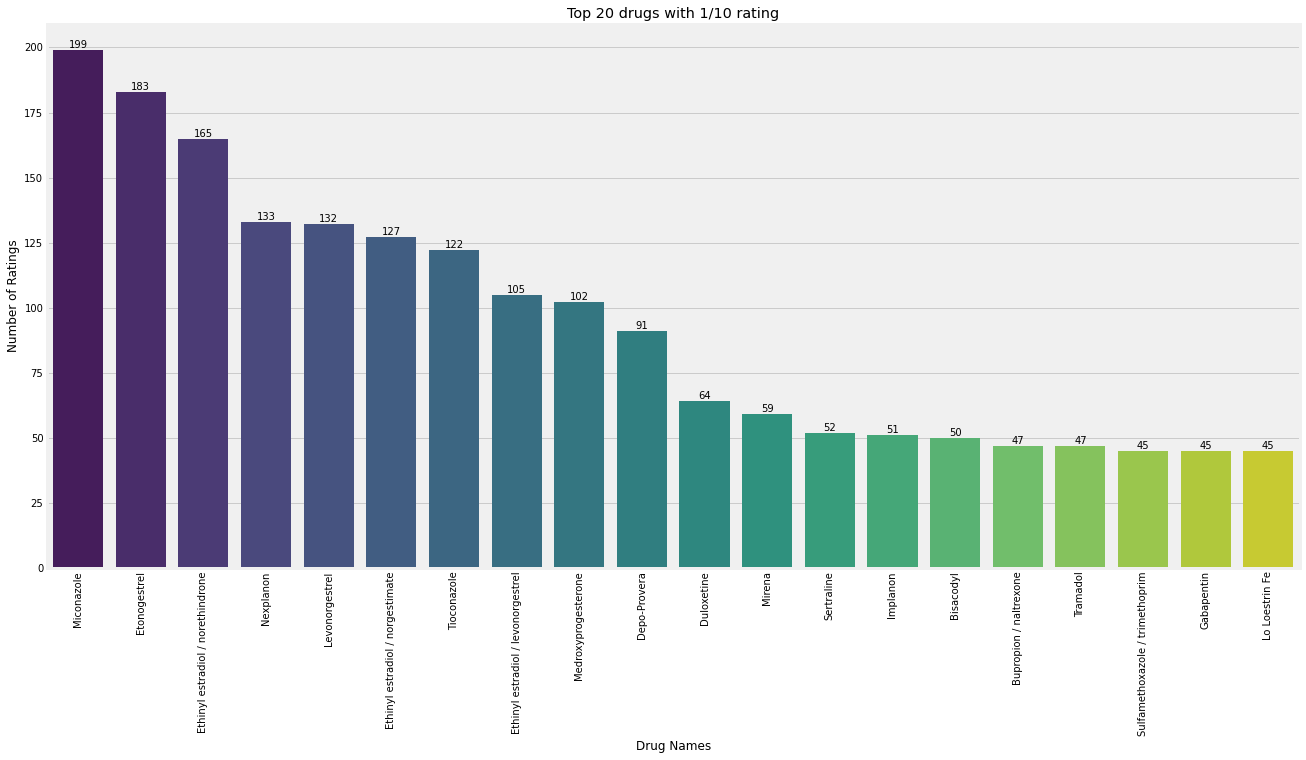

In [18]:
# Least 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'viridis')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

**Norethindrone, Miconzole** are the Drugs with the **Least ratings** given by users

### -- What are the groups/classification of drugs used?
+ suffix or endings

In [19]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [20]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [21]:
classify_drug('valsartan')

'arb blocker'

In [22]:
df['drug_class'] = df['drugName'].apply(classify_drug)

In [23]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Mirtazapine,None
1,Mesalamine,None
2,Bactrim,None
3,Contrave,None
4,Cyclafem 1 / 35,None
...,...,...
53761,Tamoxifen,None
53762,Escitalopram,None
53763,Levonorgestrel,None
53764,Tapentadol,None


In [24]:
# How many Groups of Drugs By Class
df['drug_class'].unique().tolist()

[None,
 'opiod analgesics',
 'antifungal (except metronidazole)',
 'antibiotic',
 'anti-anxiety',
 'calcium channel blocker',
 'antipyschotics (phenothiazine)',
 'h2 blockers (anti-ulcers)',
 'oral hypoglycemics',
 'beta blockers',
 'barbiturate',
 'ace inhibitor',
 'antibiotic (cephalosporins)',
 'pituitary hormone',
 'corticosteroid (prednisone)',
 'beta blocker',
 'alpha blocker',
 'anesthetic',
 'thrombolytics',
 'antibiotic(penicillins)',
 'arb blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [25]:
# How many Groups of Drugs By Class
grp_drugs = len(df['drug_class'].unique().tolist())
print('Groups of Drugs by Class - ',grp_drugs)

Groups of Drugs by Class -  23


### -- Which class of Drug is the most common ?

In [26]:
# Which of class of drug  is the most commonest
df['drug_class'].value_counts()

antifungal (except metronidazole)    1388
opiod analgesics                     1387
oral hypoglycemics                   1157
antibiotic                           1131
anti-anxiety                          919
h2 blockers (anti-ulcers)             434
beta blockers                         318
corticosteroid (prednisone)           314
antipyschotics (phenothiazine)        208
arb blocker                           179
ace inhibitor                         133
calcium channel blocker                91
alpha blocker                          56
anesthetic                             47
thrombolytics                          45
antibiotic(penicillins)                33
beta blocker                           32
neuromuscular blocking agents          21
antibiotic (cephalosporins)            14
barbiturate                            10
pituitary hormone                       8
anticoagulants                          5
Name: drug_class, dtype: int64

In [28]:
# Which of class of drug  is the most commonest

plt.figure(figsize=(20,10))
sns_1 = sns.countplot(df['drug_class'], palette = 'spring')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Drug class")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

ValueError: could not convert string to float: 'opiod analgesics'

<Figure size 1440x720 with 0 Axes>

#### Observations :

+ The most commonest class/group of drugs used are 
    - **Antifungal**
    - **Opiod Analgesics(Pain Killers)**
    - **Oral Hypoglycemics (DM)**
    - **Antibiotic**

### -- Distribution of Drugs(class) Per Drug Group based on size

In [29]:
# Distribution of Drugs Per Drug Group based on size
drug_groups = df.groupby('drug_class').size()

In [30]:
type(drug_groups)

pandas.core.series.Series

In [31]:
# Convert to DF
# Method 1
drug_groups.to_frame()

,0
drug_class,
ace inhibitor,133
alpha blocker,56
anesthetic,47
anti-anxiety,919
antibiotic,1131
antibiotic (cephalosporins),14
antibiotic(penicillins),33
anticoagulants,5
antifungal (except metronidazole),1388


In [32]:
# Convert to DF
# Method 2
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})

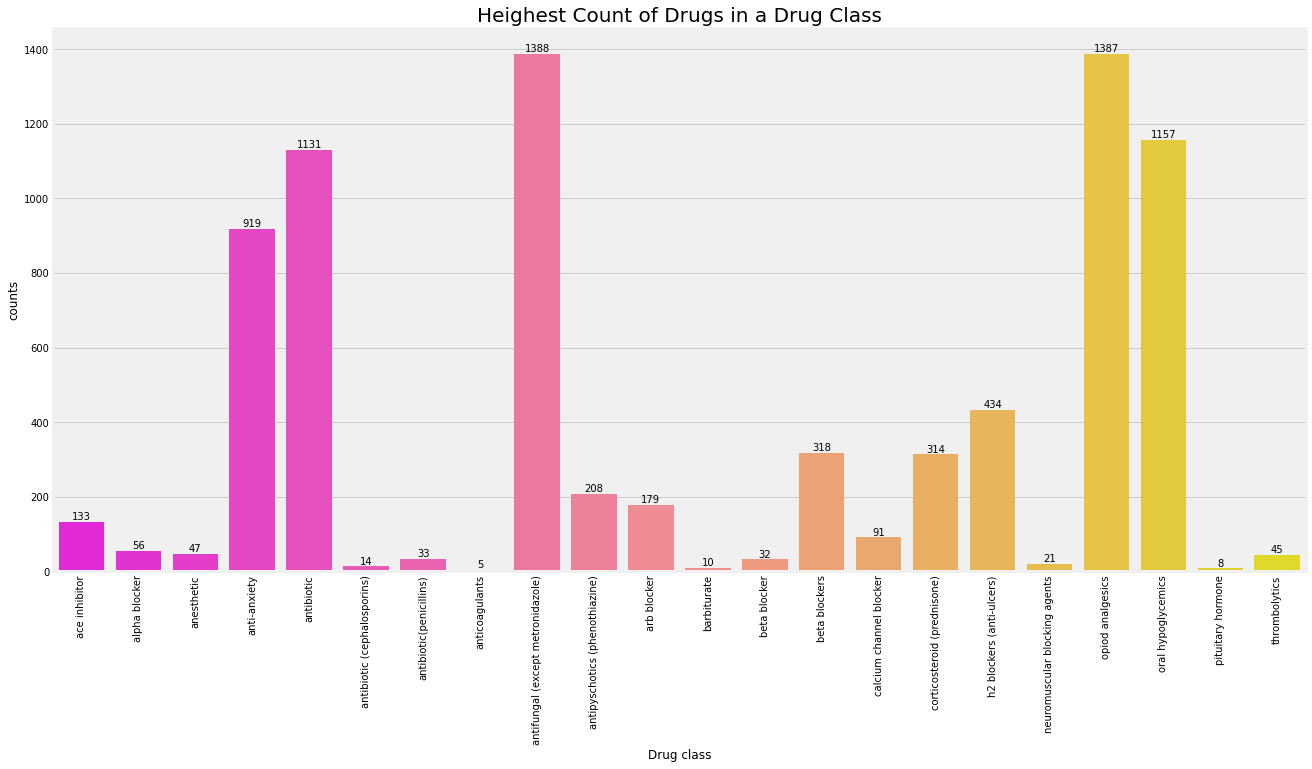

In [33]:
# Seaborn Plot
plt.figure(figsize=(20,10))
# g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette='gnuplot_r')

sns_1 = sns.barplot(data=drug_groups_df,x='drug_class',y='counts', palette = 'spring')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Heighest Count of Drugs in a Drug Class', fontsize=20)
sns_1.set_xlabel("count")
sns_1.set_xlabel("Drug class")


sns_1.set_xticklabels(drug_groups_df['drug_class'].values,rotation=90)
plt.show()

#### Observations :

Here we can see **Antifungal, Opiod Analgesics, Oral Hypoglycemeics** is the Drug Class with **heighest count of Drugs**


### -- How many Conditions are suffered by patients?

In [34]:
len(df['condition'].unique().tolist())

709

#### Observation :

+ We have 885 different conditions

In [35]:
#### Distribution of Conditions
df['condition'].value_counts()

Birth Control                                  9648
Depression                                     3095
Pain                                           2100
Anxiety                                        1908
Acne                                           1847
                                               ... 
Gender Dysphoria                                  1
83</span> users found this comment helpful.       1
Meningococcal Meningitis Prophylaxis              1
Tympanostomy Tube Placement Surgery               1
Strongyloidiasis                                  1
Name: condition, Length: 708, dtype: int64

### -- Most common condition suffered

In [36]:
#### Most commonest Conditions
common_conditions = df['condition'].value_counts().nlargest(20)

In [37]:
# Change the Variable Name
new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})

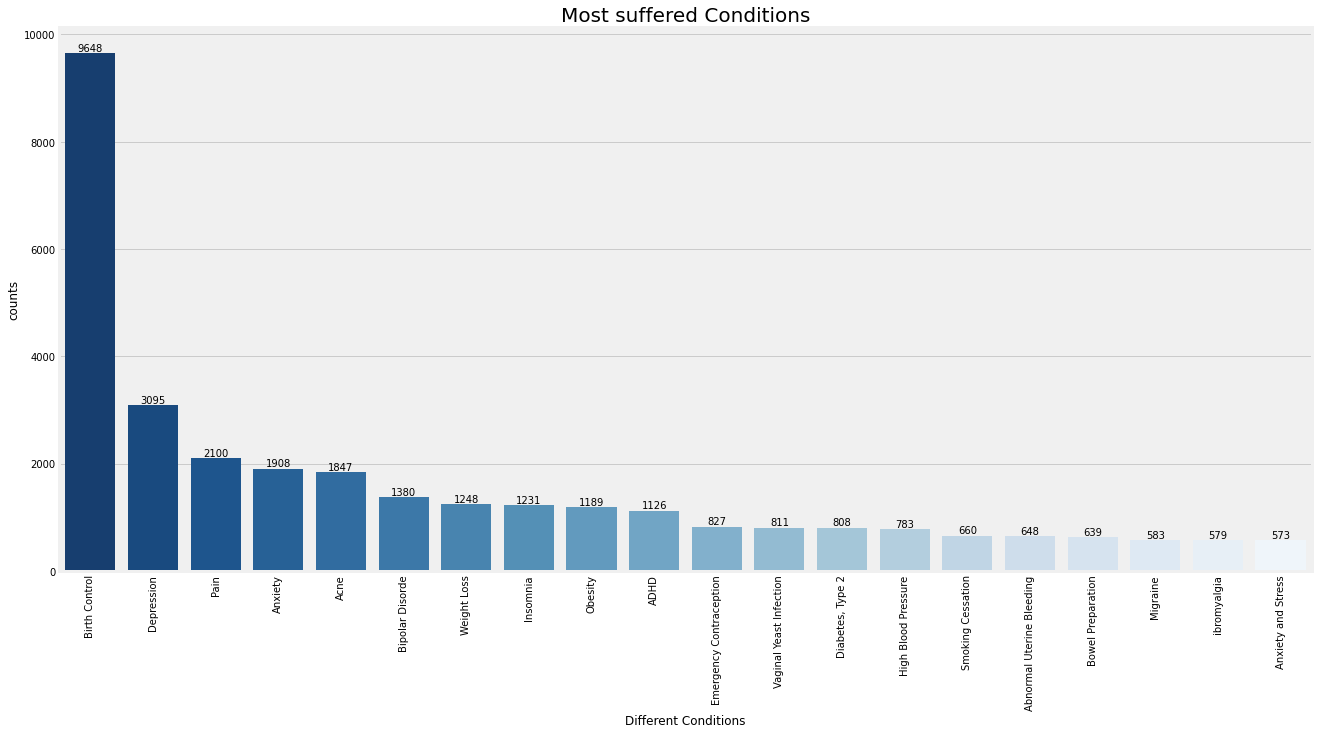

In [38]:
#### Most commonest Conditions
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Most suffered Conditions', fontsize=20)
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Different Conditions")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

#### Observations :
+ The most commonest condition is **Birth Control**,followed by **Depression** and **Pain and Anxiety**
+ Makes sense as compared to the drug distribution

### -- Least common Condition suffered

In [39]:
df['condition'].value_counts().nsmallest(20)

Wolff-Parkinson-White Syndrome                  1
Sunburn                                         1
me                                              1
Urinary Retention                               1
Head Injury                                     1
Herpes Zoster, Prophylaxis                      1
Pemphigus                                       1
Strabismus                                      1
Organ Transplant, Rejection Reversal            1
Gonadotropin Inhibition                         1
Squamous Cell Carcinoma                         1
Leukemia                                        1
ibrocystic Breast Disease                       1
Ovarian Cance                                   1
Premature Ejaculation                           1
Glioblastoma Multi                              1
B12 Nutritional Deficiency                      1
cal Segmental Glomerulosclerosis                1
100</span> users found this comment helpful.    1
Hyperkalemia                                    1


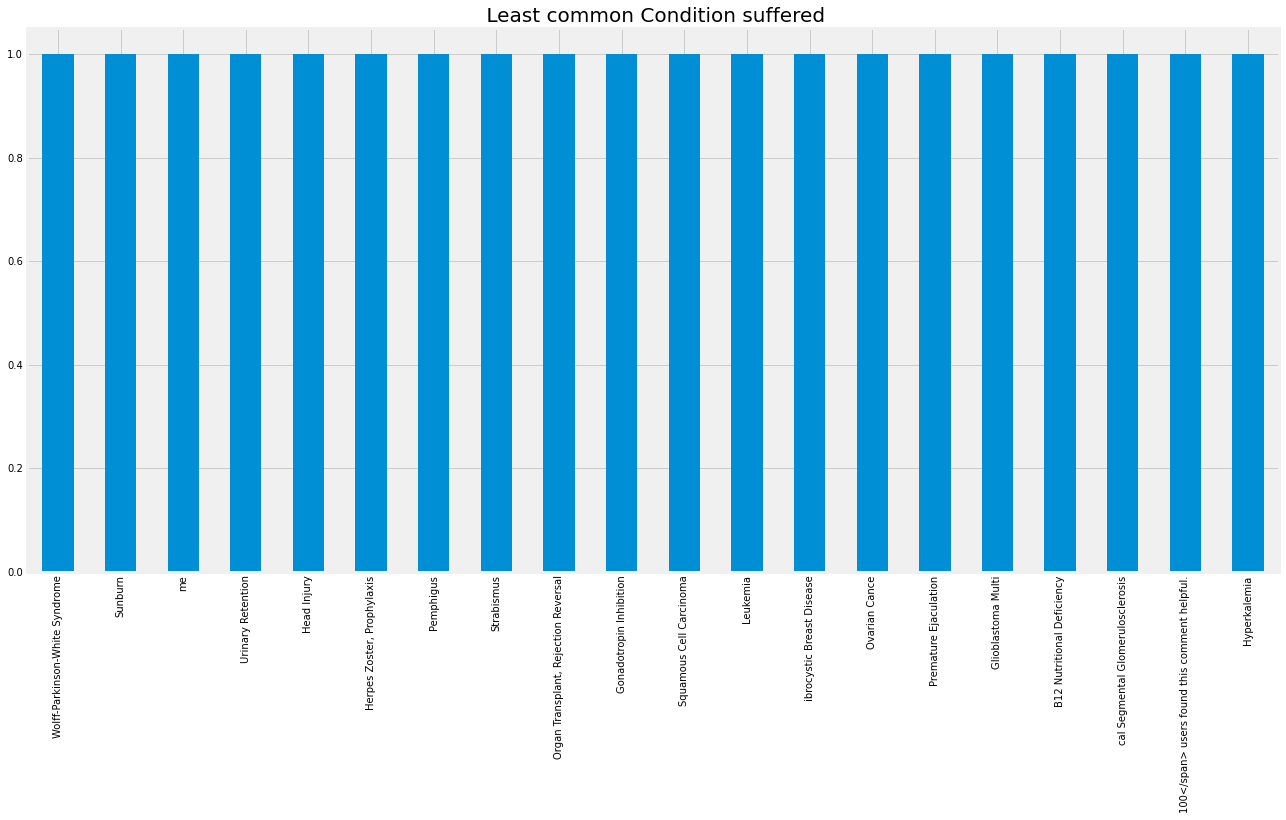

In [40]:
#### Least commonest Conditions
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))
plt.title(' Least common Condition suffered', fontsize=20)
plt.show()

### -- How many type of Drugs per condition (Top 20)

In [41]:
drug_per_cond = df.groupby('condition')['drugName'].nunique().nlargest(20)

In [42]:
drug_per_cond_df = pd.DataFrame({'drug_class':drug_per_cond.index,'counts':drug_per_cond.values})

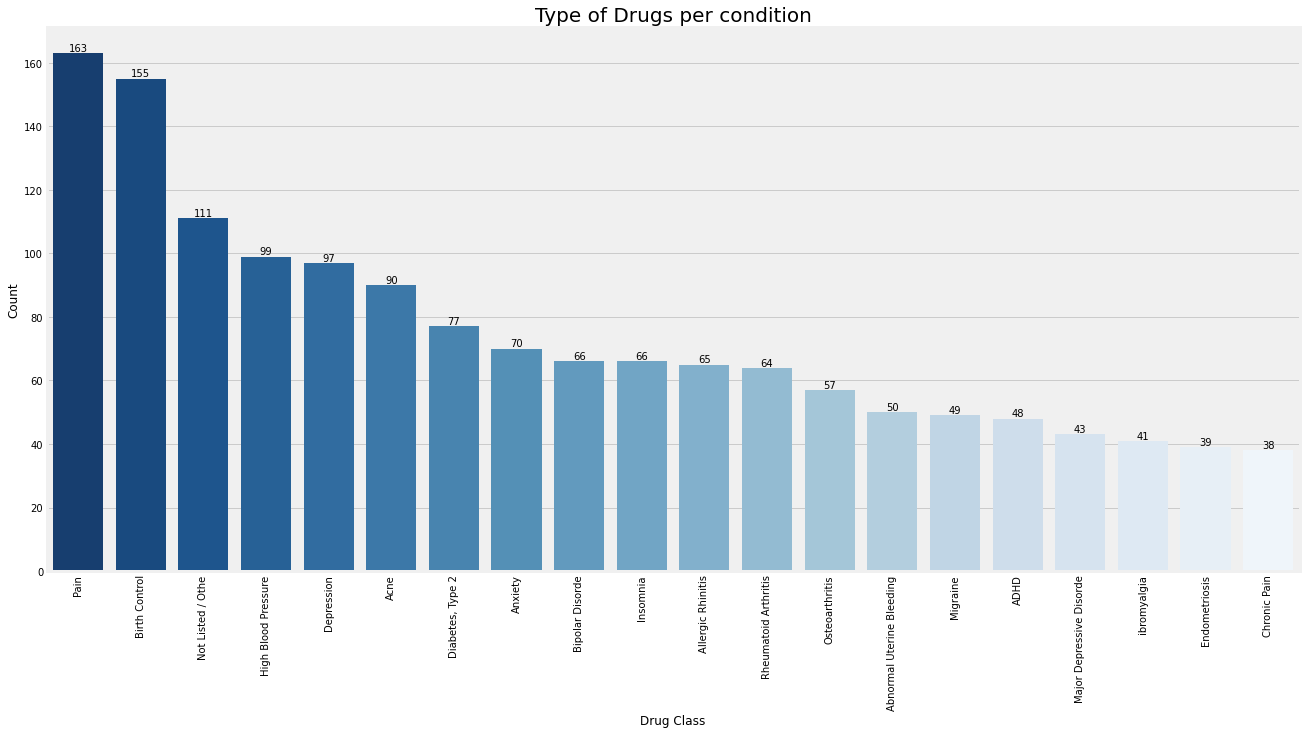

In [43]:
# How many Drugs per condition (Top 20)
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_per_cond_df,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Type of Drugs per condition', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

#### Observation :

+ **Pain, Birth Control** and **HBP** have the highest number of different/unique drugs for their condition


### -- Distrubtion of Rating given by Users

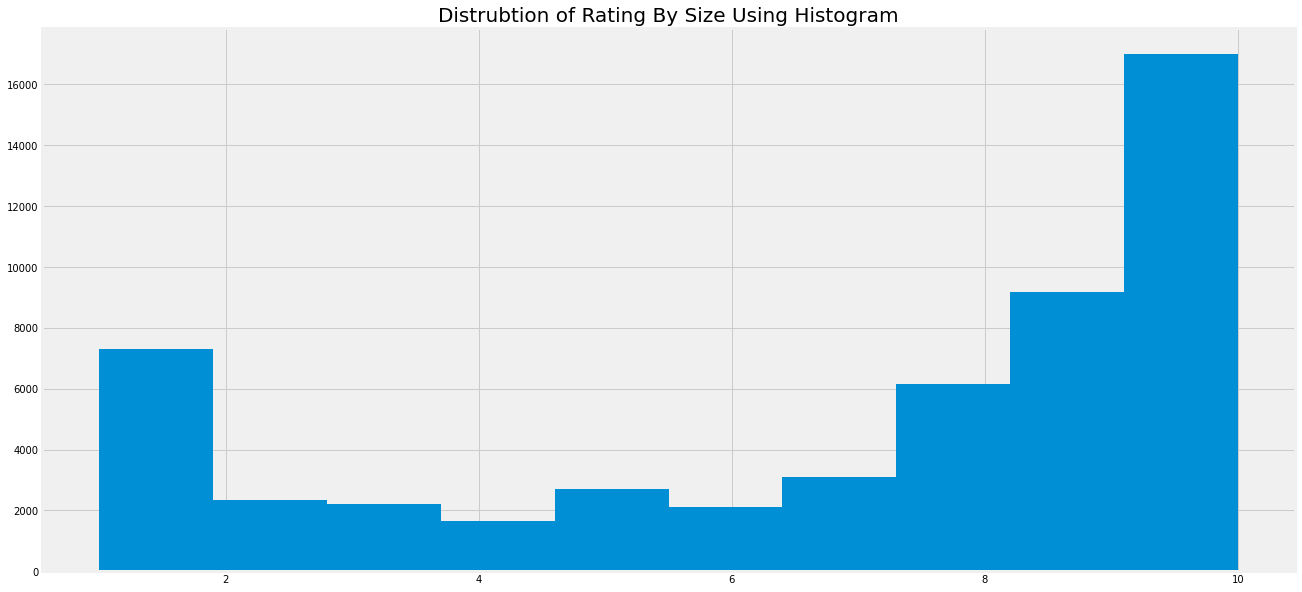

In [44]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

#### Observation :
+ Most people rated at the **extremes i.e (0 and 10)**

### -- Average Rating of Drugs

In [45]:
# Average Rating of Drugs
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A / B Otic                              10.00000
Abacavir / dolutegravir / lamivudine     9.00000
Abacavir / lamivudine                   10.00000
Abatacept                                6.50000
Abilify                                  6.14966
                                          ...   
ZzzQuil                                  1.00000
depo-subQ provera 104                   10.00000
ella                                     7.70000
femhrt                                   9.00000
pHisoHex                                10.00000
Name: rating, Length: 2637, dtype: float64

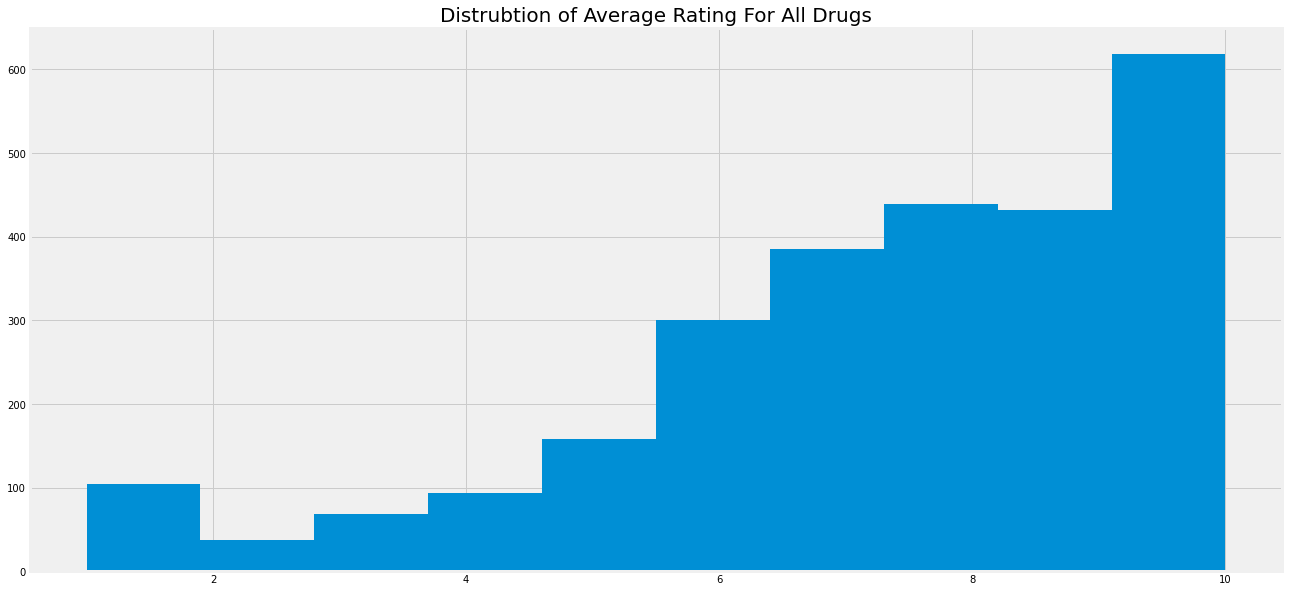

In [46]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs", fontsize=20)
plt.show()

#### Observation :

The **Majority of Rating** given by the users are **from 6 to 10**

## Insights on Date Column :

#### Transforming date columns

In [47]:
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

### -- Number of Reviews each Year

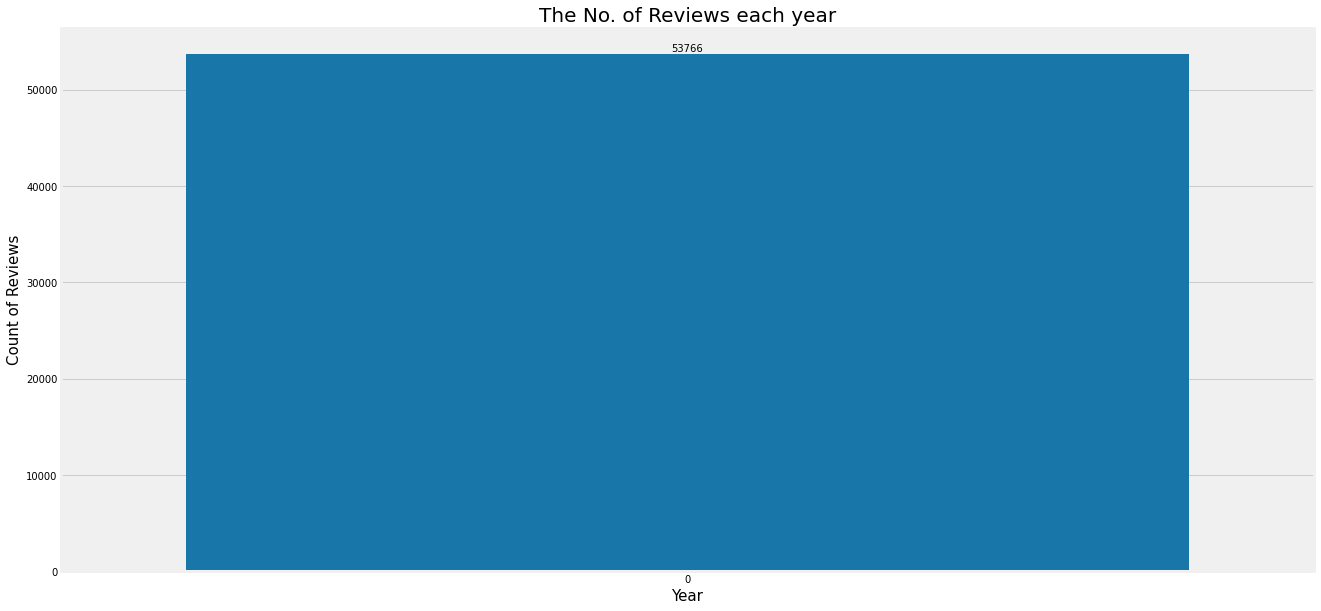

In [48]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['Year'], palette ='winter_r')

for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('The No. of Reviews each year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

#### Observations :

From above plot we can see that **Year 2016 had the heighest number of reviews** followed by **Year 2017 and 2015**

### -- Number of Reviews each Month

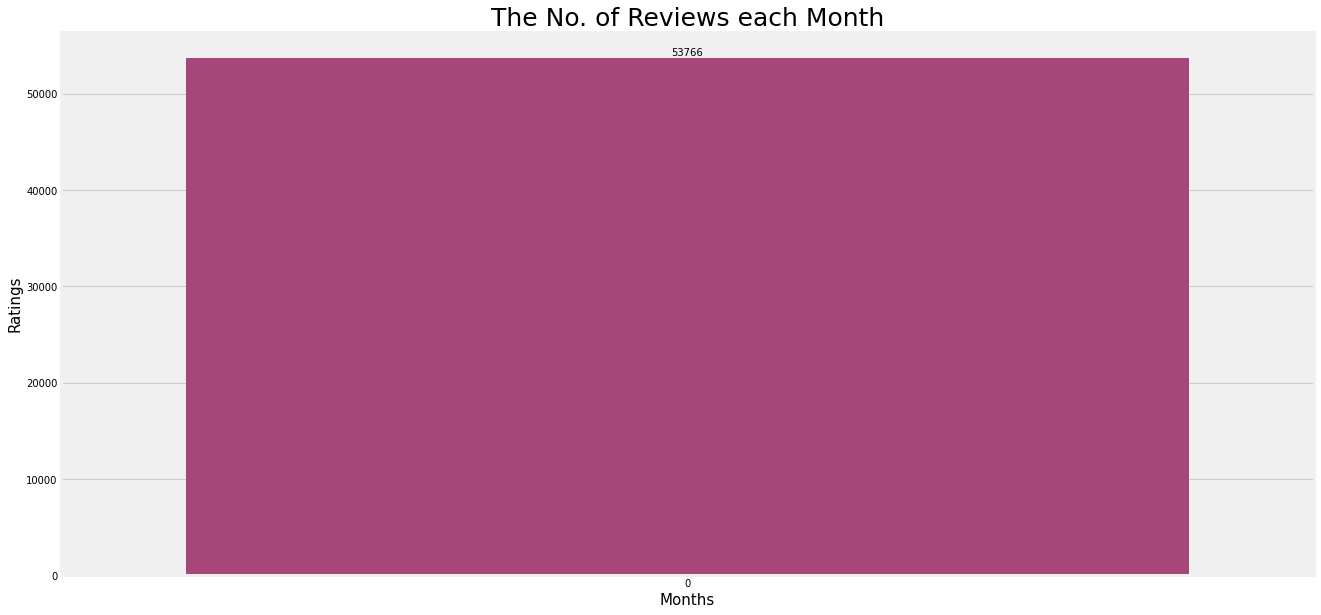

In [49]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['month'], palette ='magma')

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('The No. of Reviews each Month', fontsize = 25)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

#### Observations :

**August** month has the heighest reviwes **followed by October** month.

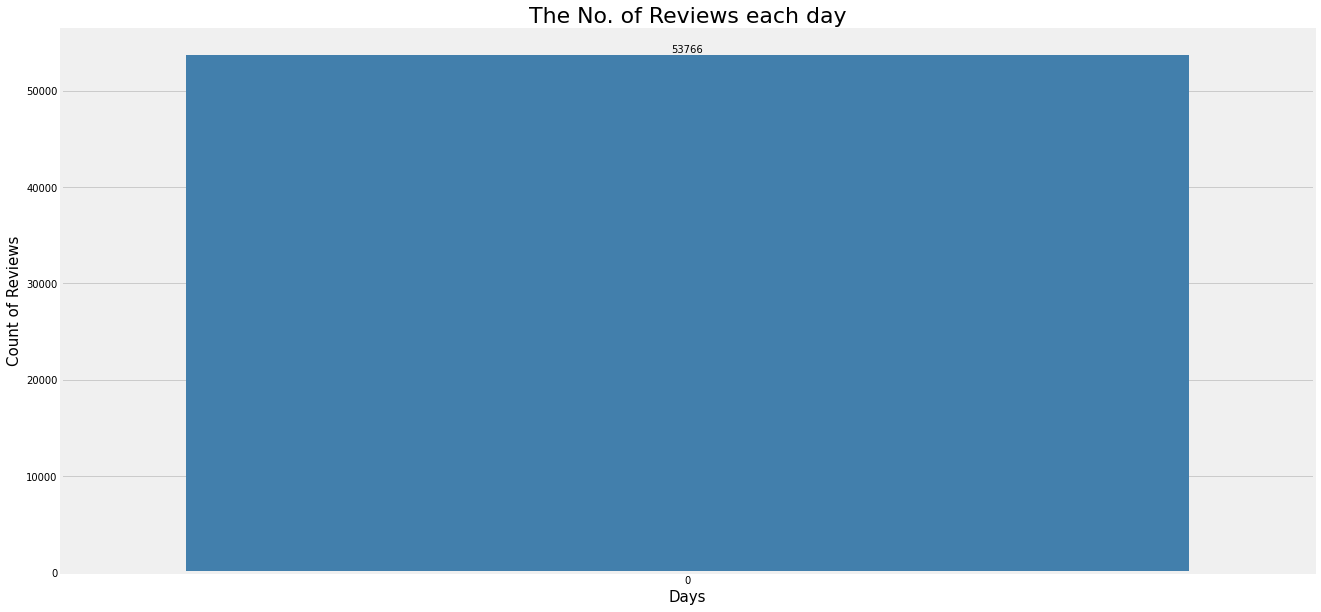

In [50]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(df['day'], palette ='tab20c')

for i in sns_.containers:
    sns_.bar_label(i)
    
plt.title('The No. of Reviews each day', fontsize = 22)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

### -- How genuine is the review? (Using sentiment analysis)

In [51]:
from textblob import TextBlob

In [52]:
df['review'].head()

0    "I&#039;ve tried a few antidepressants over th...
1    "My son has Crohn&#039;s disease and has done ...
2                        "Quick reduction of symptoms"
3    "Contrave combines drugs that were used for al...
4    "I have been on this birth control for one cyc...
Name: review, dtype: object

In [53]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [54]:
# text fxn
get_sentiment("I love apples")

0.5

In [55]:
# text fxn
get_sentiment_label("I love apples")

'positive'

In [56]:
# Sentiment Score for Review
df['sentiment'] = df['review'].apply(get_sentiment)

In [57]:
# Sentiment Labels for Review
df['sentiment_label'] = df['review'].apply(get_sentiment_label)

In [58]:
df[['review','sentiment','sentiment_label']].head()

,review,sentiment,sentiment_label
0,"""I&#039;ve tried a few antidepressants over th...",0.000000,neutral
1,"""My son has Crohn&#039;s disease and has done ...",0.566667,positive
2,"""Quick reduction of symptoms""",0.333333,positive
3,"""Contrave combines drugs that were used for al...",0.139063,positive
4,"""I have been on this birth control for one cyc...",0.260926,positive


### -- How many positive and negative and neutral reviews?

In [59]:
df['sentiment_label'].value_counts()

positive    33469
negative    17941
neutral      2356
Name: sentiment_label, dtype: int64

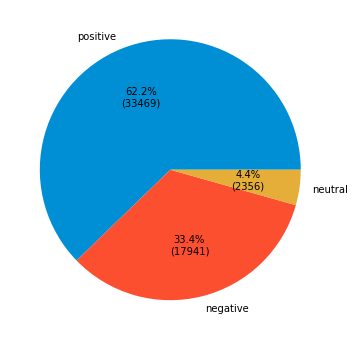

In [60]:
plt.figure(figsize=(12,6))

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

#### Obserevation :

We can see that Majority of reviews given by users are **Positive(62.6%)** and **Negative(33%)**, while **Neutral reviews are (4.3%)**

### -- Correlation Between Our sentiment and rating

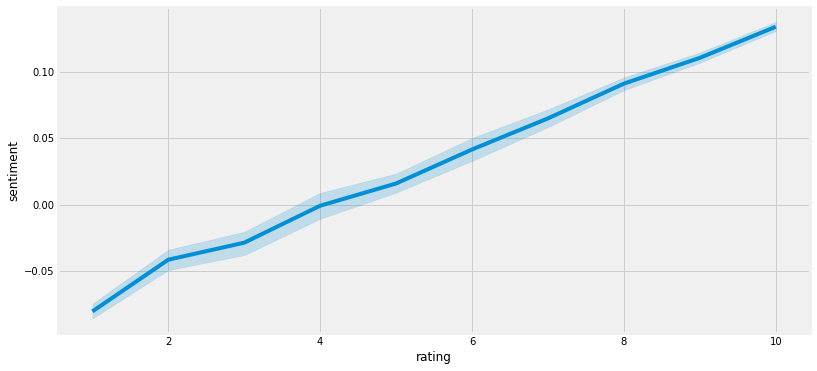

In [61]:
#### Correlation Between Our sentiment and rating
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

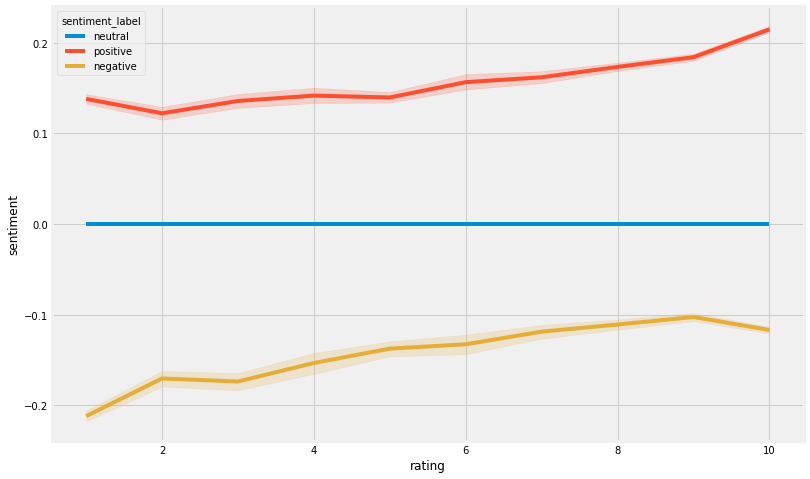

In [62]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')
plt.show()

### Observation :
* The positive Ratings are increasing gradually which indicates that the patients are getting better by the use of the prescribed Drugs
* The Negative Ratings are decreasing which is a good sign that the Drugs given to patients are effective


### -- How many reviews are genuine as compared to the rating
+ Genuine **good rating** =positive + rating 10-6
+ Genuine **bad rating** = negative + rating 4-1

In [63]:
# Genuine Good  Rating Per Review
good_review =  len(df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')])
print('According to Sentiment and Rating the number of Good Ratings are -', good_review)

According to Sentiment and Rating the number of Good Ratings are - 26845


In [64]:
# Genuine Bad  Rating Per Review
bad_review = len(df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')])
print('According to Sentiment and Rating the number of Good Ratings are -', bad_review)

According to Sentiment and Rating the number of Good Ratings are - 7512


In [65]:
# df.groupby('drugName')['usefulCount'].value_counts()

### -- Top Drugs name Per UsefulCount

In [66]:
drug_usefulcount = df.groupby('drugName')['usefulCount'].nunique().nlargest(20)

In [67]:
drug_usefulcount_df = pd.DataFrame({'drug_name':drug_usefulcount.index,'counts':drug_usefulcount.values})

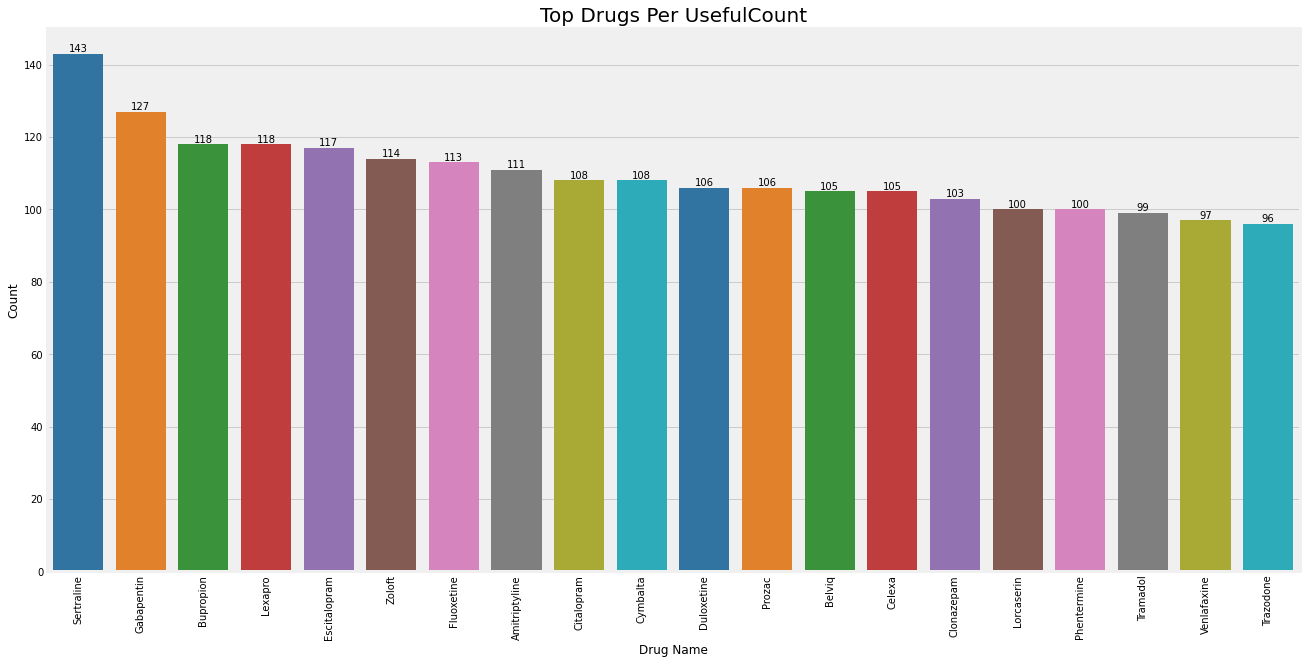

In [68]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_usefulcount_df,x='drug_name',y='counts', palette = 'tab10')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Top Drugs Per UsefulCount', fontsize=20)
sns_1.set_xlabel("Drug Name")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observation :

**Fluoxetine, Gabapentin** and **Bupropion** are the Drugs which are most useful for treating people

### -- Top Drug Class per UsefulCount

In [69]:
# Top Drugs Class Per UsefulCount
drug_class_usefulcount = df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)

In [70]:
drug_class_usefulcount_df = pd.DataFrame({'drug_class':drug_class_usefulcount.index,'counts':drug_class_usefulcount.values})

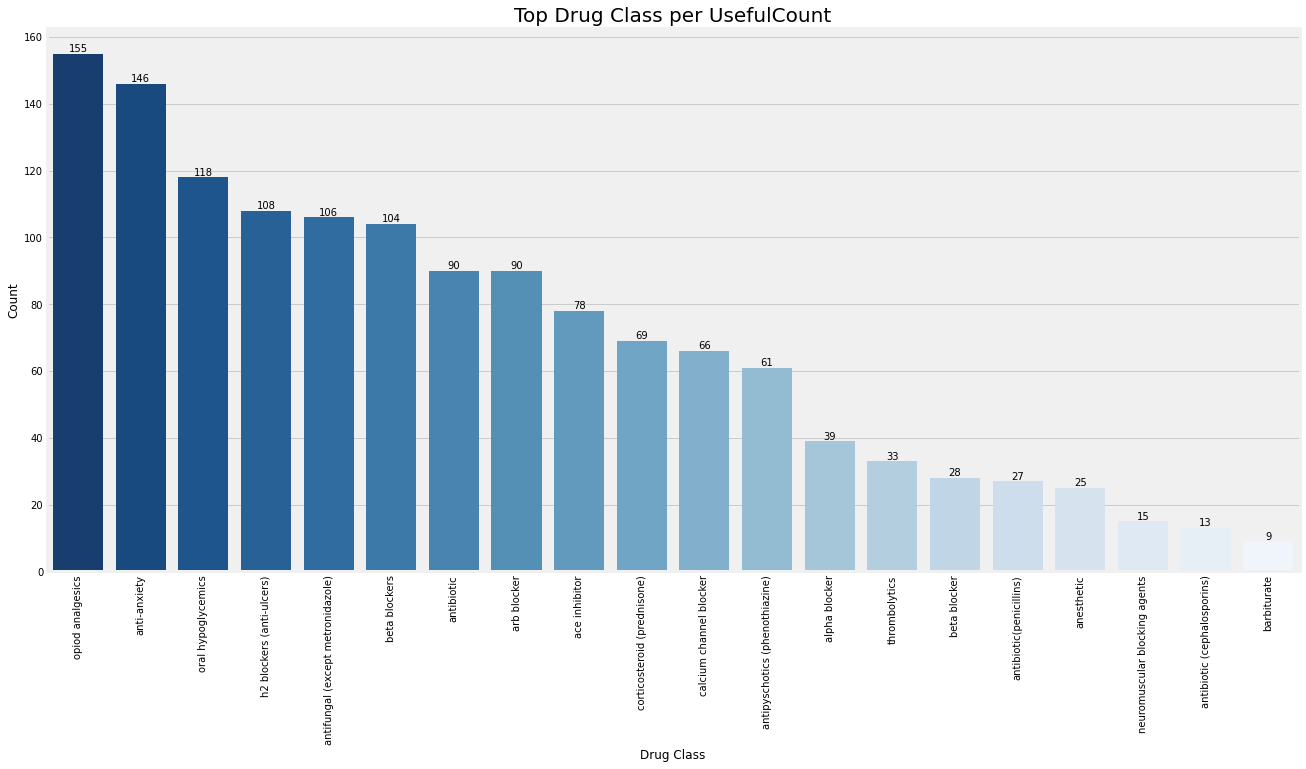

In [71]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=drug_class_usefulcount_df,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Top Drug Class per UsefulCount', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observations :

**Opiod analgesics, anti-anxiety** and **oral hypoglycemics** are the top 3 Drug Classes used to treat the people

### -- Least Useful Drug Class 

In [72]:
# Top Drugs Class Per UsefulCount
least_drug_class_usefulcount = df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20)

In [73]:
least_drug_class_usefulcount_df = pd.DataFrame({'drug_class':least_drug_class_usefulcount.index,'counts':least_drug_class_usefulcount.values})

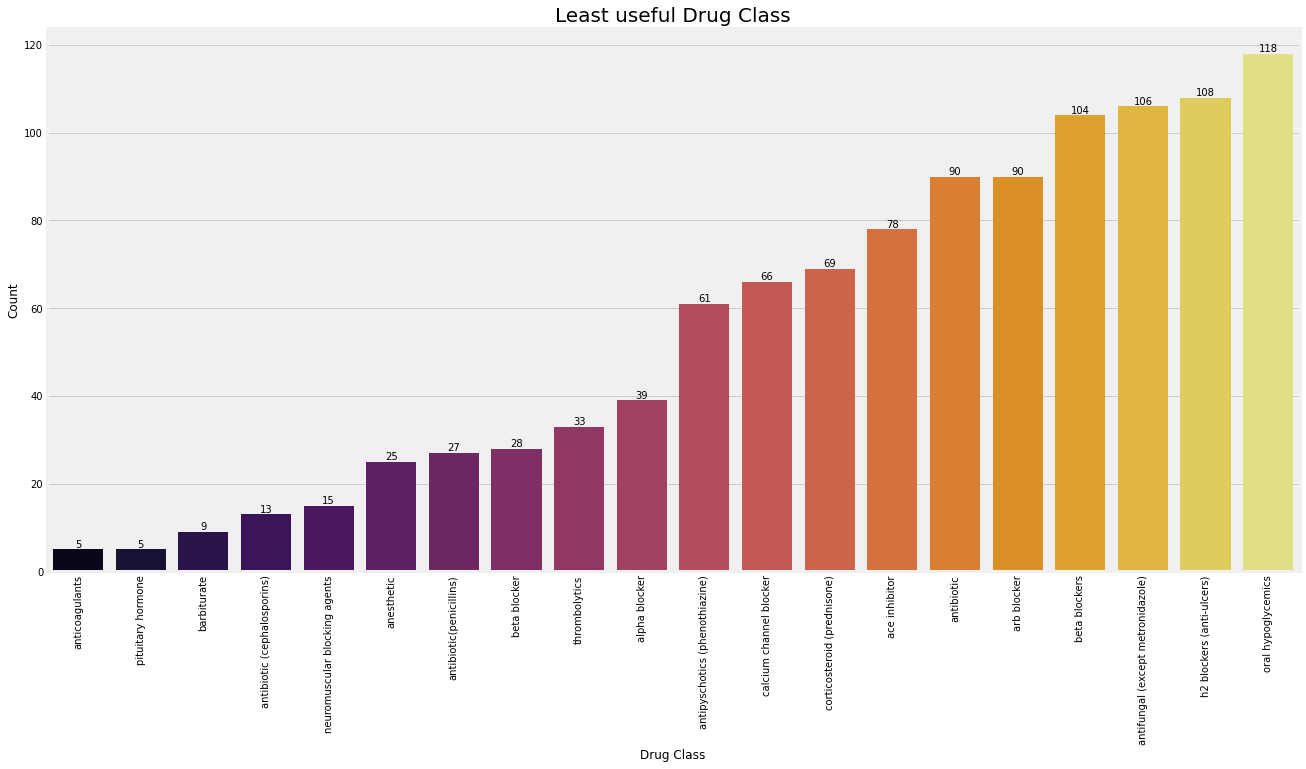

In [74]:
plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=least_drug_class_usefulcount_df,x='drug_class',y='counts', palette = 'inferno')

for i in sns_1.containers:
    sns_1.bar_label(i,)
    
sns_1.set_title('Least useful Drug Class', fontsize=20)
sns_1.set_xlabel("Drug Class")
sns_1.set_ylabel("Count")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

### Observation :

**Anticoagulant, barbiturate** and **pitutary harmone** is the Least used Drug Class for perscribed for peoples

<AxesSubplot: xlabel='rating', ylabel='usefulCount'>

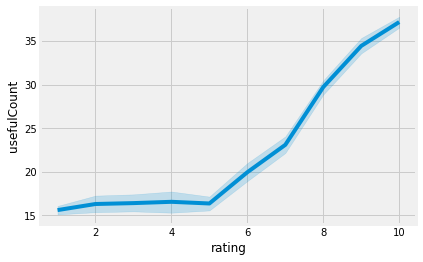

In [75]:
### Correlation between Rating and Usefulcount
sns.lineplot(data=df,x='rating',y='usefulCount')